In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# Dados


In [2]:
#Diametros
d = [0,0,0,0,0,0,0,0,0]

d[0] = np.array([35.15, 36.10, 37.05, 34.20, 34.60, 35.40, 35.20, 34.85, 39.70, 33.50, 35.10, 36.70, 33.00, 36.80, 
                32.05, 36.10, 35.20, 36.50, 37.80, 35.30, 35.00, 34.60, 37.10, 33.20, 34.60, 35.10, 35.00, 34.90,
                34.60, 35.10, 35.50, 35.80, 37.20, 35.00, 34.35, 34.20, 34.35, 34.50, 34.75, 36.15, 36.10, 35.60,
                35.65, 33.65, 34.65, 33.55, 33.65, 36.45, 36.10]) #mm
d[1] = np.array([27.20, 27.15, 28.25, 27.1, 25.8, 25.7, 27.15, 27.2, 28.25, 28.00, 26.20, 27.60, 25.70, 26.40, 26.35, 
                24.10, 27.60, 28.10, 27.90, 28.40, 27.20, 26.60, 27.80, 25.85, 27.85]) #mm
d[2] = np.array([19.10, 18.40, 19.95, 21.1, 17.6, 19, 19.05, 18.45, 19.95, 18.30, 19.50, 18.85, 19.35, 19.60, 18.70,
                17.80, 18.80, 18.50, 19.80, 19.85, 19.60, 19.90, 19.05, 19.07, 19.15]) #mm
d[3] = np.array([14.05, 14.60, 14.70, 14.45, 14.5, 14.1, 14.6, 14.05, 14.7, 16.35, 15.55, 15.70, 15.40, 15.20, 14.70, 
                14.95, 14.45, 14.40, 14.60, 16.00, 15.30, 14.90, 15.10, 15.20, 16.20]) #mm
d[4] = np.array([10.95, 10.80, 11.40, 11.6, 10.85, 11.1, 11, 10.8, 11.4, 11.30, 11.15, 11.60, 11.35, 10.95, 11.20,
                11.70, 10.60, 11.30, 11.70, 10.30, 10.15, 11.15, 11.40, 11.62, 11.50]) #mm
d[5] = np.array([8.70, 8.20, 8.55, 9.1, 9, 8.35, 8.7, 8.2, 8.65, 8.55, 9.80, 9.10, 8.60, 8.40, 8.45, 8.70, 8.25, 9.20,
                8.70, 8.60, 8.80, 8.75, 8.30, 8.32, 8.30]) #mm
d[6] = np.array([6.40, 6.10, 6.35, 6.35, 6.3, 6.55, 6.45, 6.25, 6.4, 5.70, 6.20, 6.55, 6.20, 6.05, 6.20, 6.30,
                6.75, 6.40, 6.65, 6.65, 6.15, 6.50, 6.85, 6.10, 6.38]) #mm
d[7] = np.array([4.90, 4.80, 4.75, 5.05, 4.8, 5.3, 4.95, 4.75, 4.8, 5.00, 5.50, 4.75, 4.90, 4.60, 4.65, 4.40, 4.85,
                5.40, 5.30, 5.35, 5.10, 4.50, 4.90, 5.90, 5.39]) #mm
d[8] = np.array([3.70, 3.95, 4.00, 3.8, 4, 4.6, 3.8, 4, 3.9, 3.50, 3.80, 3.60, 3.90, 3.65, 3.90, 3.65, 3.55, 
                4.00, 4.50, 4.40, 4.15]) #mm

#Massas
m = np.array([4.93, 2.53, 1.23, 0.63, 0.33, 0.14, 0.08, 0.04, 0.02]) #g





In [3]:
print(np.log10(d[0]))

[1.54592533 1.5575072  1.56878821 1.53402611 1.5390761  1.54900326
 1.54654266 1.54220278 1.59879051 1.52504481 1.54530712 1.56466606
 1.51851394 1.56584782 1.50582803 1.5575072  1.54654266 1.56229286
 1.5774918  1.54777471 1.54406804 1.5390761  1.56937391 1.52113808
 1.5390761  1.54530712 1.54406804 1.54282543 1.5390761  1.54530712
 1.55022835 1.55388303 1.57054294 1.54406804 1.53592674 1.53402611
 1.53592674 1.5378191  1.54095481 1.5581083  1.5575072  1.55145
 1.55205953 1.52698507 1.53970324 1.52569252 1.52698507 1.56169753
 1.5575072 ]


# A incerteza


In [4]:
#Incerteza do diâmetro e da massa:

sigma_d = [0,0,0,0,0,0,0,0,0]

for i, l in enumerate(d):
    sigma_d[i] = np.full(len(l), 0.03) #mm

sigma_m = np.full(9, 0.01) #g  
    

# Histograma do diâmetro da bolinha 1

In [5]:
#Valor médio:
mean_d_1 = np.mean(d[0])

#Desvio padrão da média:
desvpad = np.std(d[0])/np.sqrt((len(d[0])-1))
desvpad = float('{:g}'.format(float('{:.1g}'.format(desvpad))))

print("D +- sigma_D = (%.1f +- %.1f) [mm]" % (mean_d_1,desvpad))


D +- sigma_D = (35.2 +- 0.2) [mm]


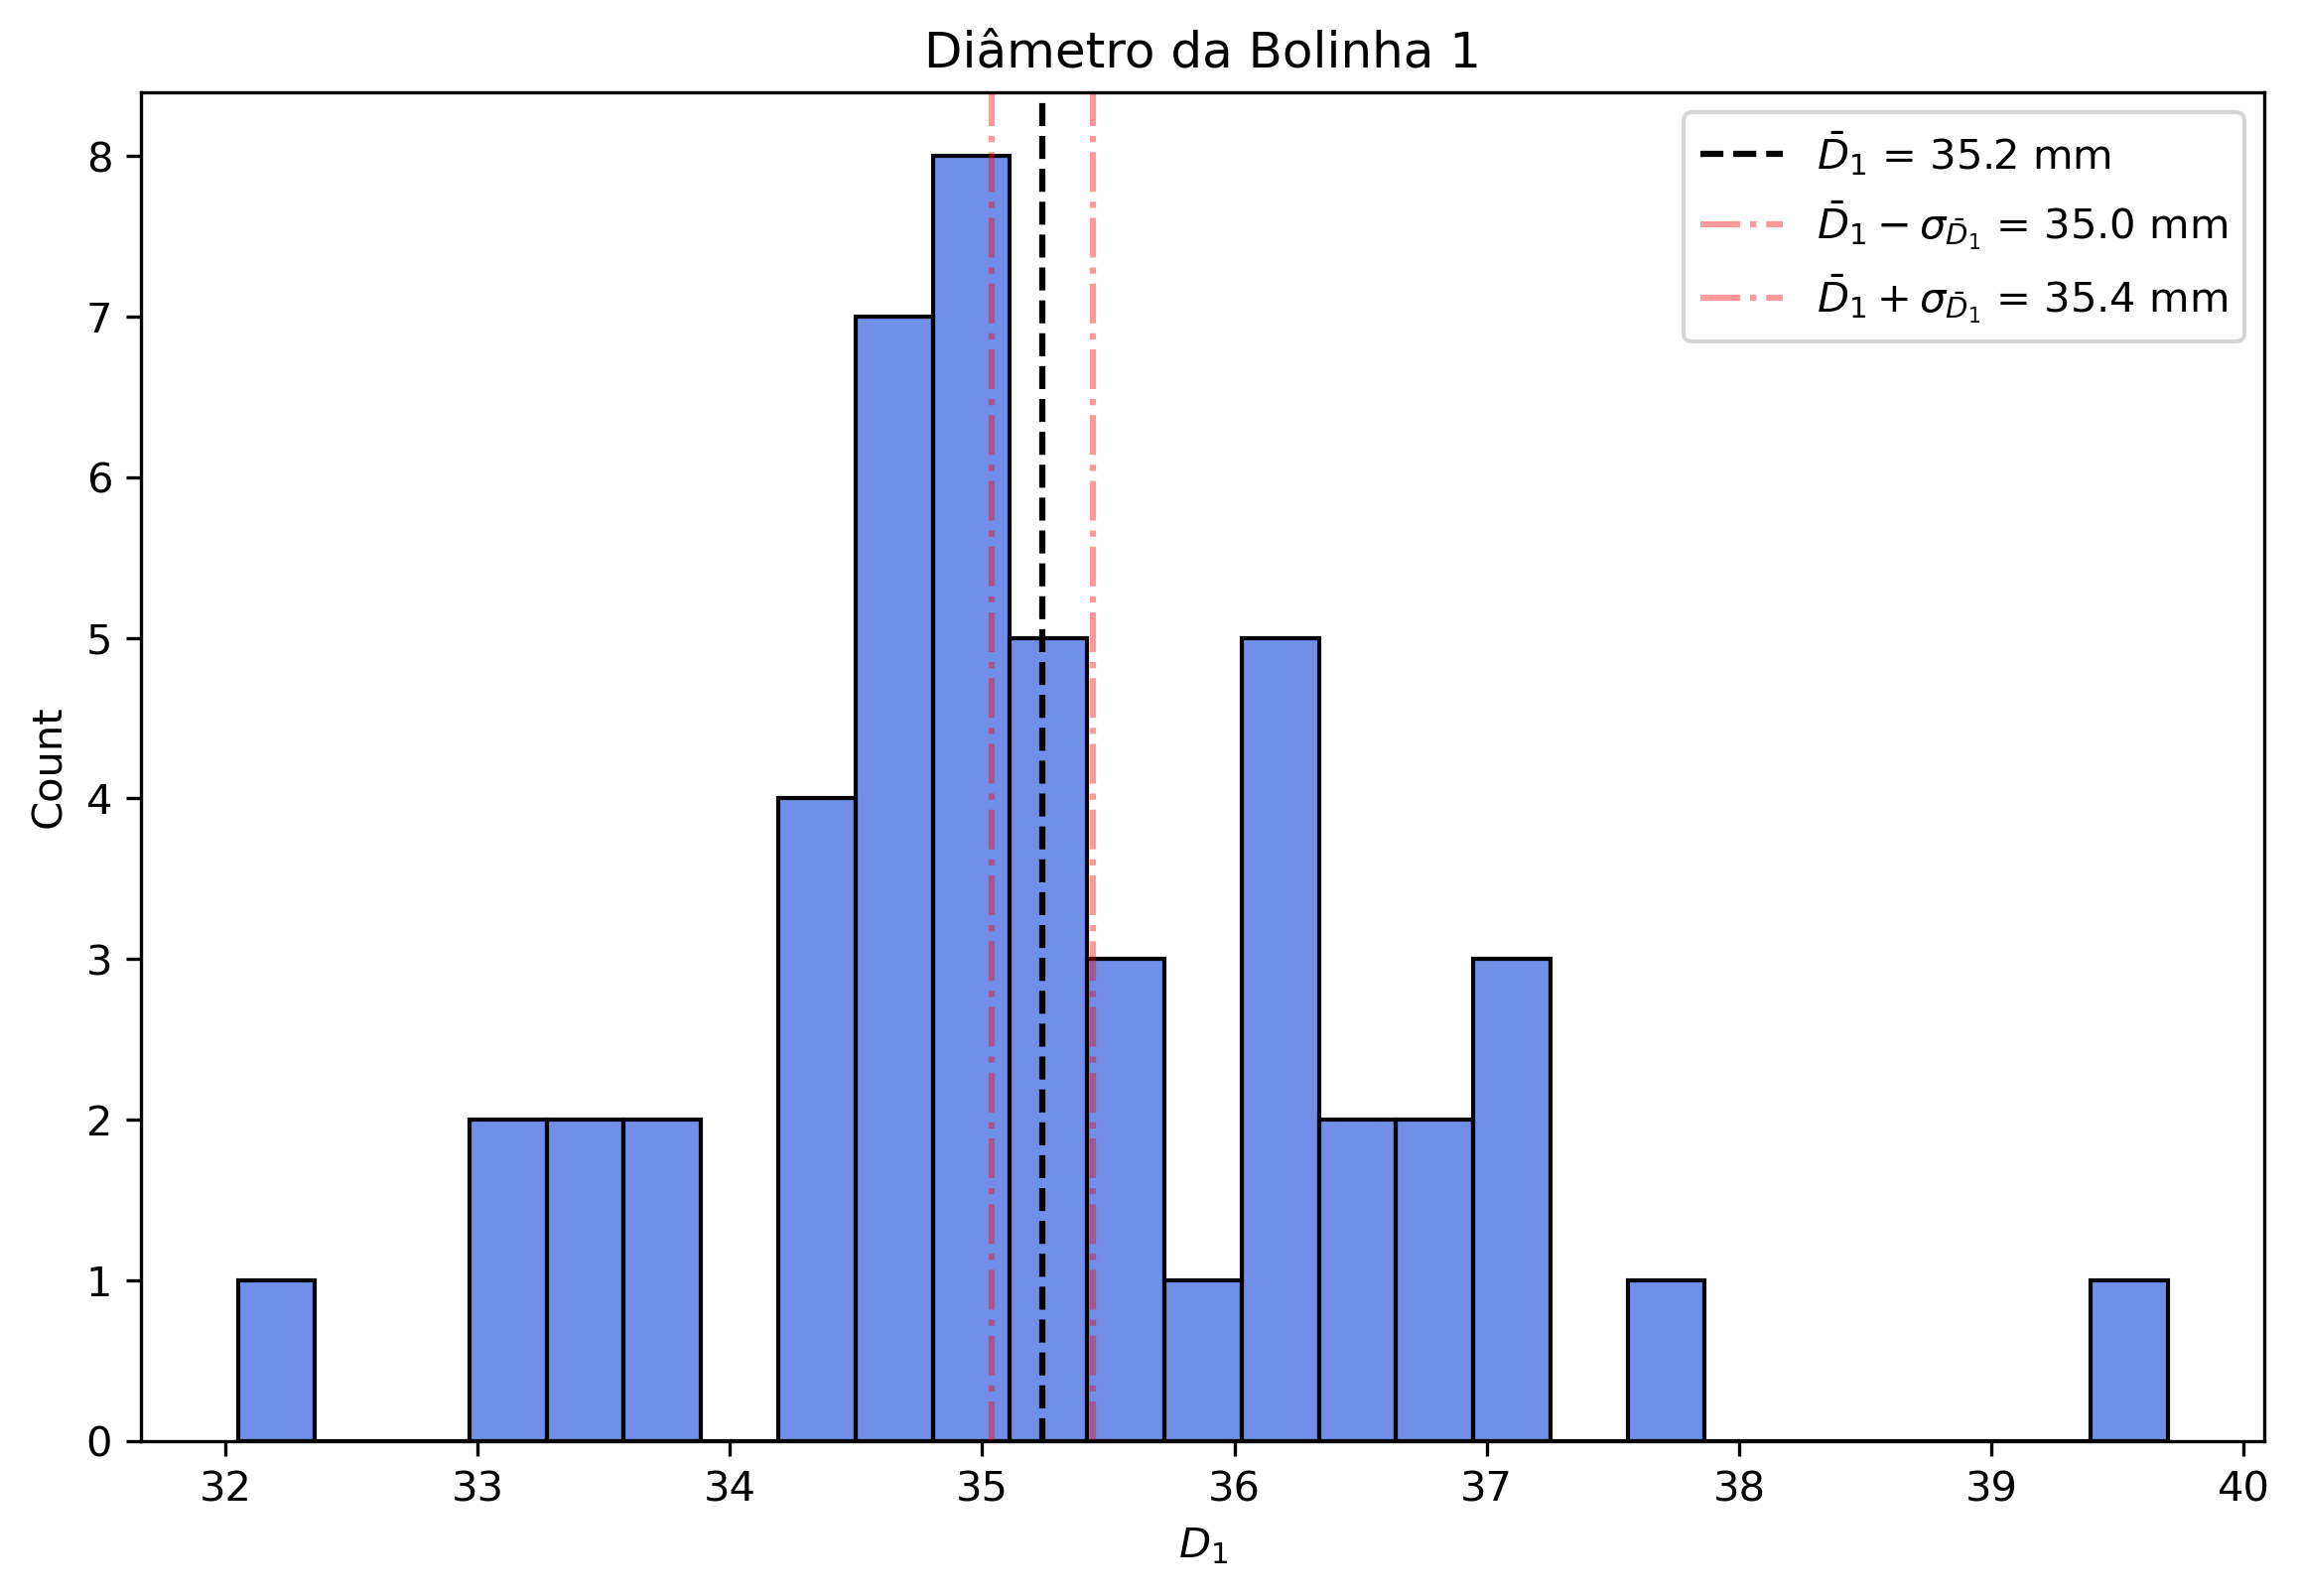

In [6]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 

sns.histplot(x = d[0], bins = 25, color = 'royalblue')
plt.axvline(mean_d_1, ls = "--", color = "black",label = r"$\bar{D}_1$ = 35.2 mm")
plt.axvline(mean_d_1 + desvpad, ls = "-.", color = "red", alpha = 0.4, label = r"$\bar{D}_1 - \sigma_{\bar{D}_1}$ = 35.0 mm")
plt.axvline(mean_d_1 - desvpad, ls = "-.", color = "red", alpha = 0.4, label = r"$\bar{D}_1 + \sigma_{\bar{D}_1}$ = 35.4 mm")
#plt.plot([mean_d_1 - desvpad, mean_d_1 + desvpad], [5,5], color = "black")

plt.xlabel(r'$D_1$')
plt.title("Diâmetro da Bolinha 1")

plt.legend()
plt.savefig('Graphs/BolinhaDePapel/HistogramaB1.pdf', dpi = 300)
plt.show()

# Gráficos dos dados brutos

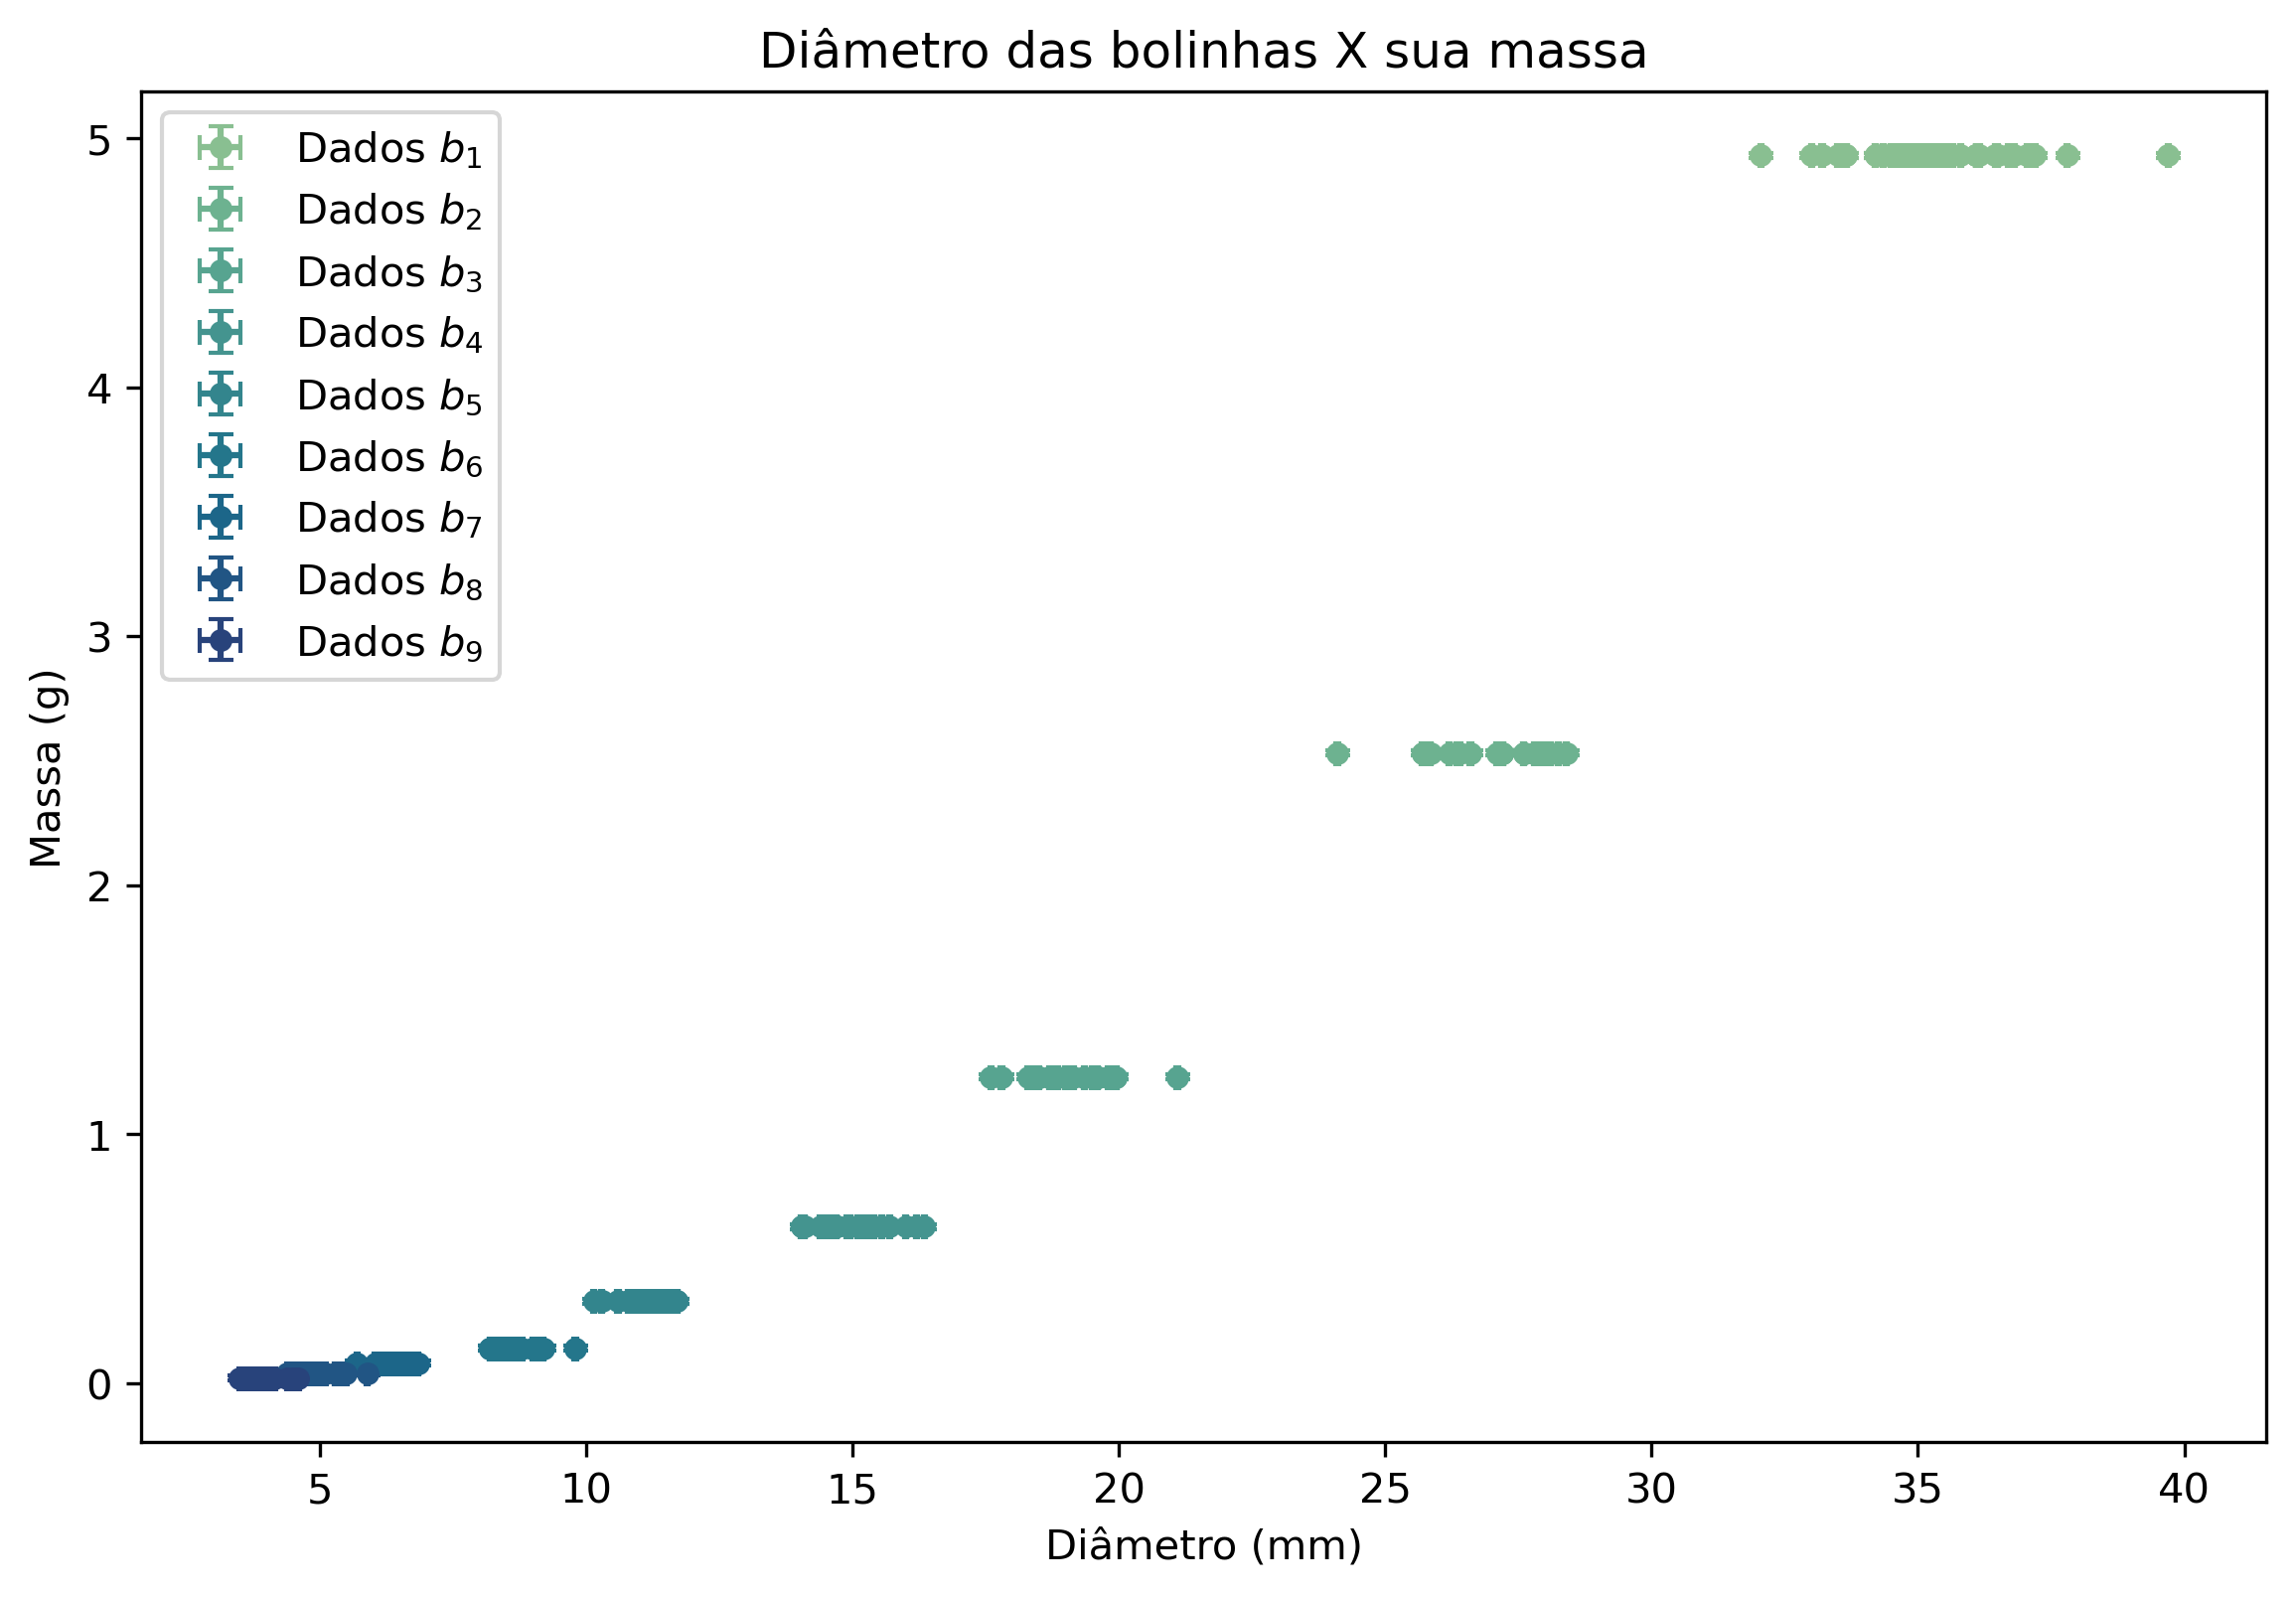

In [7]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
lbl = ['Dados $b_1$', 'Dados $b_2$', 'Dados $b_3$' ,'Dados $b_4$', 'Dados $b_5$', 'Dados $b_6$', 
       'Dados $b_7$', 'Dados $b_8$', 'Dados $b_9$']
colors = sns.color_palette("crest" ,9)

for i, diam in enumerate(d):
    plt.errorbar(diam, np.full(len(diam),m[i]), sigma_m[i], sigma_d[i], 'o', ms = 4.5, capsize=3, color = colors[i], label = lbl[i])

plt.title("Diâmetro das bolinhas X sua massa")    
plt.ylabel("Massa (g)")    
plt.xlabel("Diâmetro (mm)")    
plt.legend()    
plt.show()

# Determinando o valor médio do diâmetro de cada bolinha

In [8]:
mean_d = []

for i,diam in enumerate(d):
    mean_d.append(np.mean(diam))
    
mean_d = np.array(mean_d)    
print(mean_d)    

[35.23877551 27.018      19.1368     14.95       11.1548      8.6508
  6.3512      4.9836      3.92142857]


## Determinando a incerteza associada ao valor médio do diâmetro:

Cada Para cada bolinha nós temos um erro instrumental e um estatístico. Deste modo, a incerteza do valor médio é dada por:

$$\sigma_{\bar{D}} = \sqrt{\sigma_{instrumental}^2 + \sigma^2_{estatístico}}$$


O erro estatístico corresponde ao desvio padrão da média


In [9]:
sigma_mean_d = [0,0,0,0,0,0,0,0,0]
for i,diam in enumerate(d):
    sigma_mean_d[i] = np.sqrt(0.03**2 + (np.std(diam)/np.sqrt(len(diam)-1))**2)
    sigma_mean_d[i] = float('{:g}'.format(float('{:.1g}'.format(sigma_mean_d[i]))))

print(sigma_mean_d)

[0.2, 0.2, 0.2, 0.1, 0.09, 0.08, 0.06, 0.08, 0.07]


# Linearizando os dados através do logaritmo

In [10]:
#Calculando o logaritmo das grandezas

log_d_mean = np.log10(mean_d)
log_m = np.log10(m)



## Calculando a propagação de erros ao calcular o log de uma grandeza $x$:

Seja uma grandeza $x$, ao calcularmos o logaritmo de base 10 de $x$ o erro deve ser propagado como:

$$\sigma_{\log{x}} = \bigg\vert\frac{d\log{x}}{dx} \ \sigma_{x}\bigg\vert = \frac{1}{x\ln(10)}\sigma_x$$

In [11]:
#Calculando a incerteza de cada grandeza
sigma_log_d = sigma_mean_d/(mean_d*np.log(10))
sigma_log_m = sigma_m/(m*np.log(10))



# Verificando a linearidade:

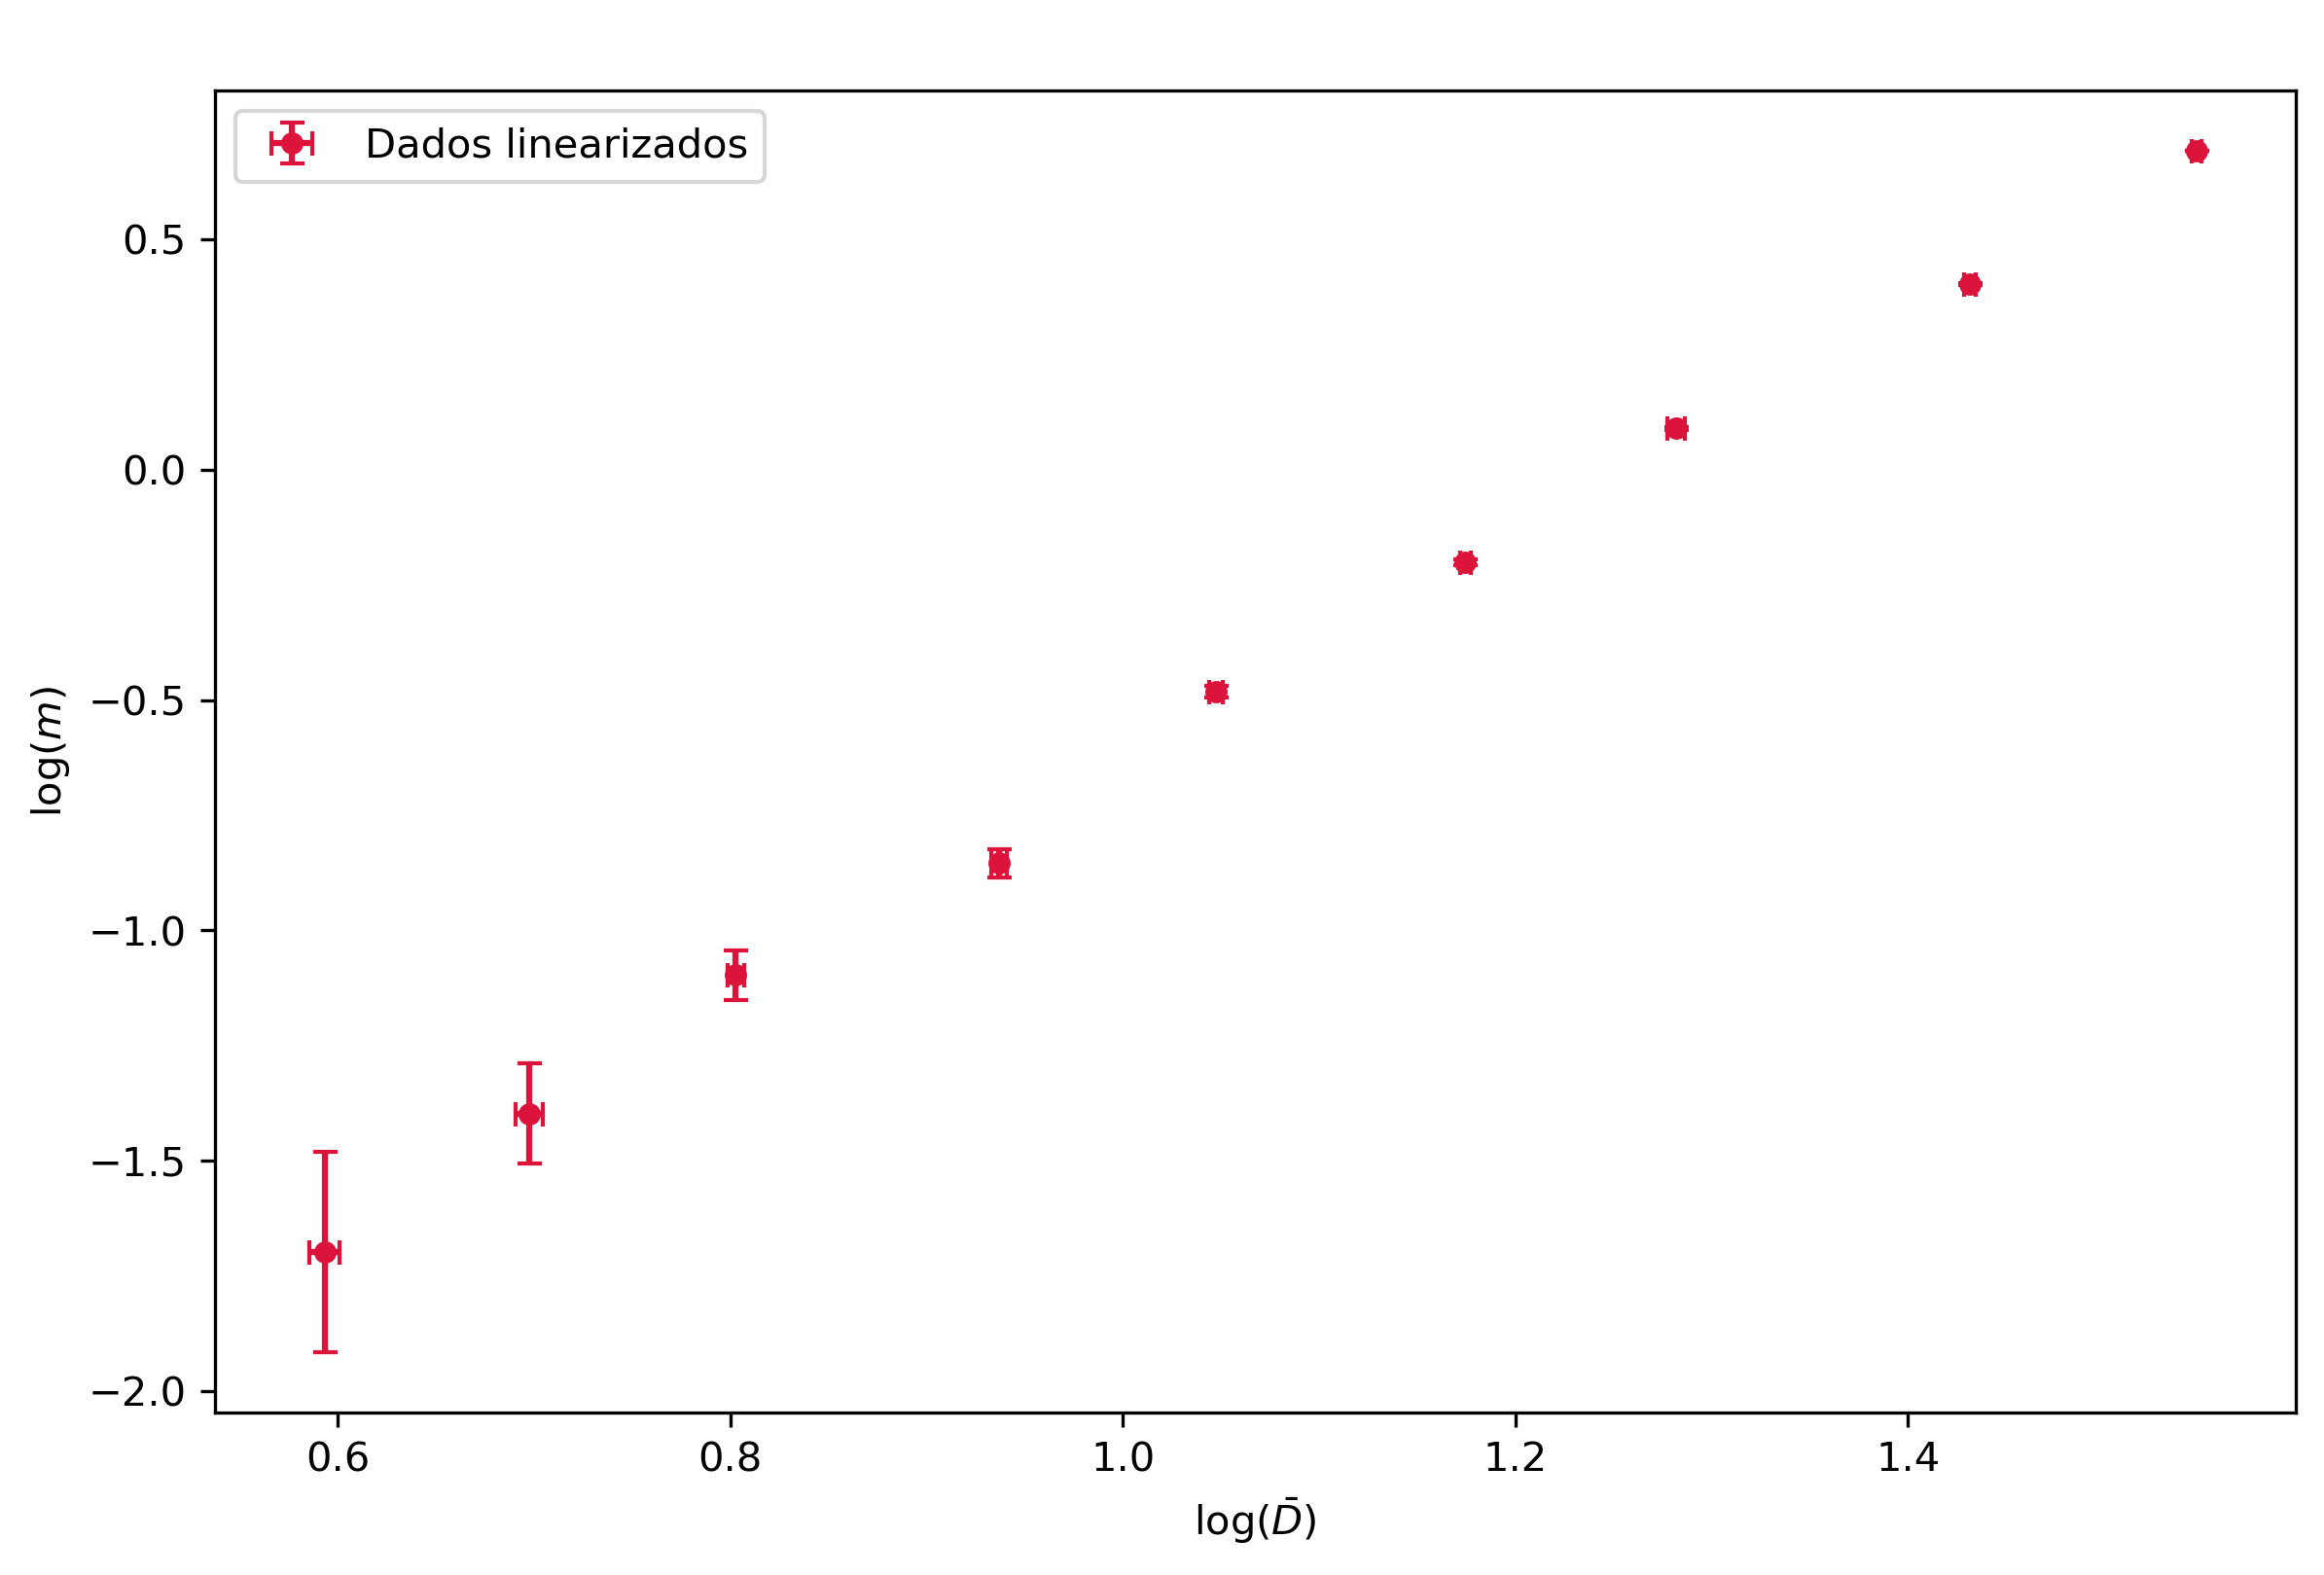

In [12]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 

plt.errorbar(log_d_mean, log_m, sigma_log_m, sigma_log_d,'o', ms = 4.5, capsize=3, color = 'crimson', label = "Dados linearizados")


plt.title(" ")    
plt.ylabel(r"$\log(m)$")    
plt.xlabel(r"$\log(\bar{D})$")    
plt.legend()
plt.savefig('Graphs/BolinhaDePapel/DadosBrutos.pdf', dpi = 300)
plt.show()

# Realizando  o ajuste linear:


In [23]:
fitpars, cov_pars = np.polyfit(log_d_mean,log_m,1,w=np.power(sigma_log_m,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.2f +- %.2f ' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f' %(coef_linear,sigma_linear))

Coeficiente angular: 2.38 +- 0.04 
Coeficiente linear: -2.99 +- 0.06


# Gráfico do ajuste linear

In [25]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, log_d_mean)
chi_squared = np.sum(((yhat - log_m)/sigma_log_m) ** 2)
chi2_red = chi_squared/(len(log_m)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 21.185


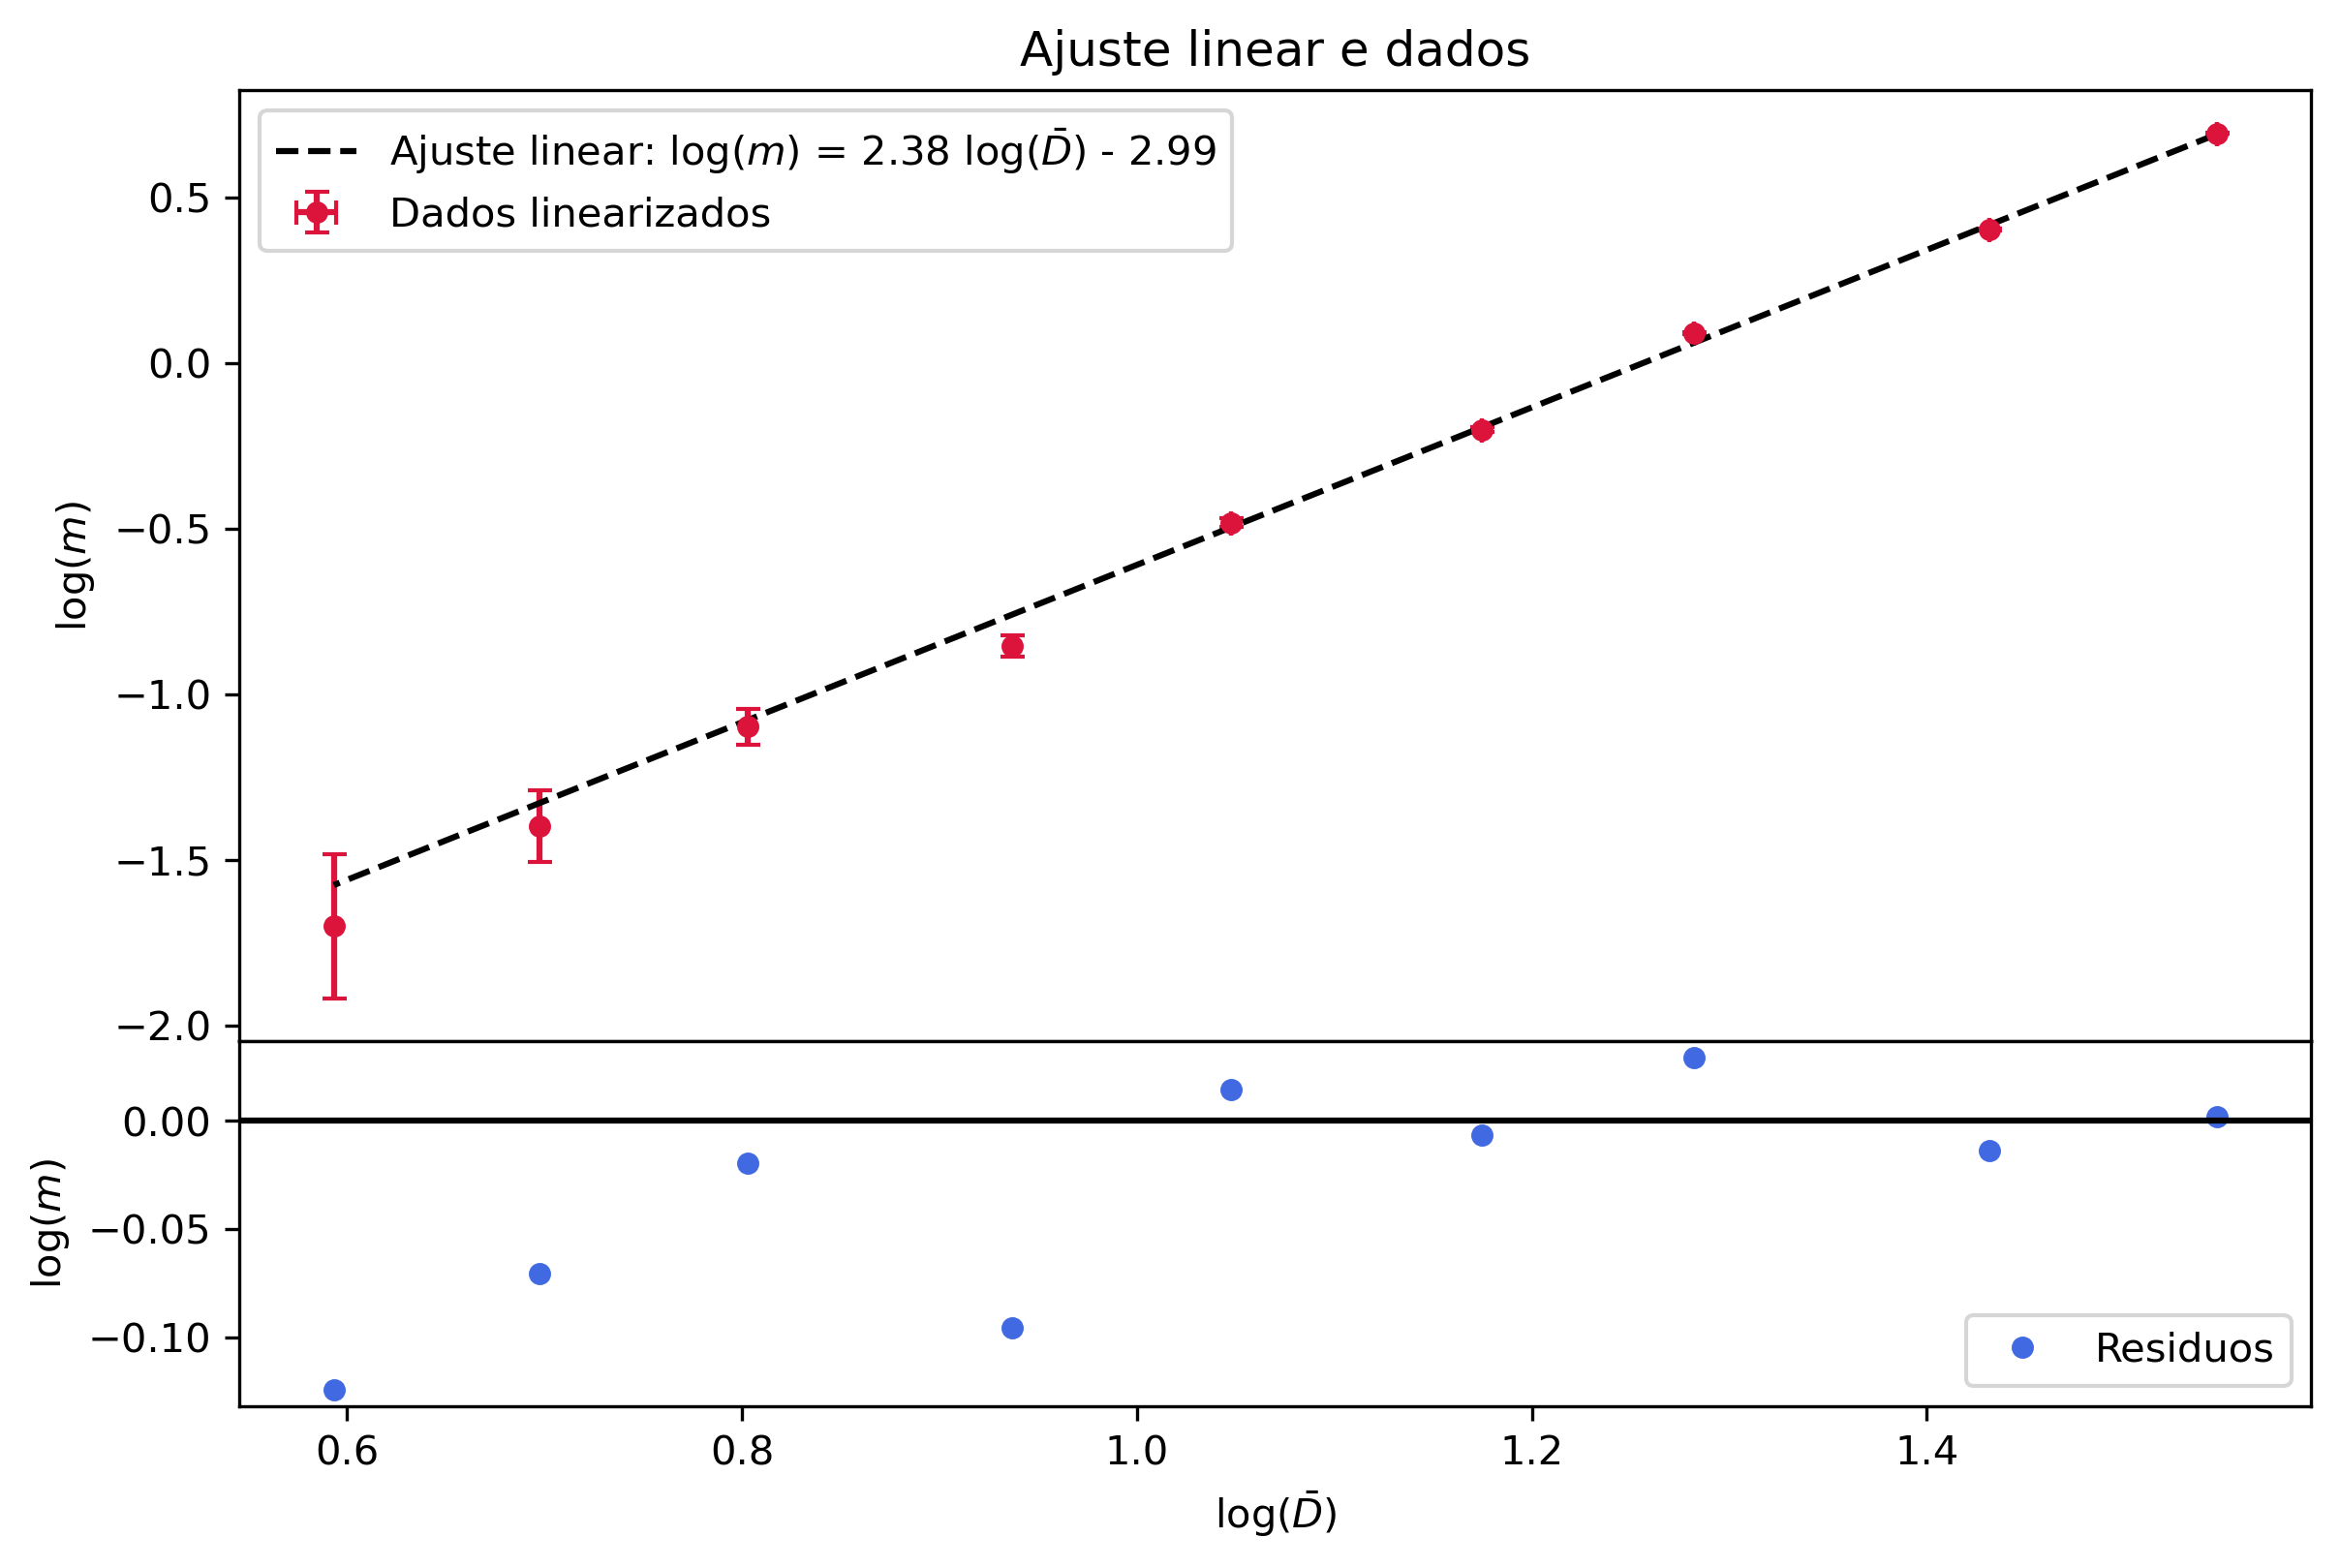

In [15]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(log_d_mean,log_m, sigma_log_m,0, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados linearizados')
axs[0].plot(log_d_mean,(log_d_mean*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $\log(m)$ = %.2f $\log(\bar{D})$ - %.2f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r"$\log(m)$")
axs[0].legend()
axs[0].set_title("Ajuste linear e dados")

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (log_m - yhat)
axs[1].plot(log_d_mean, resid, 'o',ms = 4.5,  color = 'royalblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($mT$)")
#axs[1].set_yticks(np.arange(-2,2.2,1.0)*1e-2)


    
plt.ylabel(r"$\log(m)$")    
plt.xlabel(r"$\log(\bar{D})$")    
plt.legend()    
plt.savefig('Graphs/BolinhaDePapel/Ajuste.pdf', dpi = 300)

plt.show()

# Determinando a dimensão fractal

Pela teoria, sabemos que:

$$\log{m} = d_F\log{D} + \log{k}$$


O ajuste linear que obtivemos é $\log{m} = c_a \log{D} + c_l$. Portanto, se compararmos essas equações vemos que:

$$d_F = c_a$$
$$\log{k} = c_l \implies k = 10^{c_l}$$

Utilizando os valores encontrados no ajuste linear, vemos que a dimensão fractal é:

$$d_F = 2.38 \pm 0.04$$



# Determinando a constante de proporcionalidade

Para propagarmos o erro do coeficiente linear para a constante temos que utilizar a seguinte expressão:

$$\sigma_k = \bigg\vert\frac{d10^{c_l}}{d c_l}\sigma_{c_l}\bigg\vert = 10^{c_l}\ln{(10)} \ \sigma_{c_l}$$

In [28]:
k = 10**coef_linear
sigma_k = k*np.log(10)*sigma_linear
sigma_k = float('{:g}'.format(float('{:.1g}'.format(sigma_k))))

print("k = (%.4f +- %.4f) [g/mm^{d_f}]" % (k, sigma_k))

k = (0.0010 +- 0.0001) [g/mm^{d_f}]
